<p style = "font-size : 50px; color :#A52A2A ; font-family : 'Comic Sans MS'; text-align : center; background-color :#008B8B; border-radius: 5px 5px;"><strong>Heart Disease Classification</strong></p>


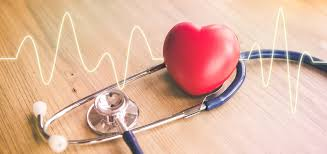 




  <a id = '1.0'></a>
<p style = "font-size : 30px; color : #4e8d7c ; font-family : 'Comic Sans MS';  "><strong>Data Description :-</strong></p>

<ul>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>age - age in years</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>sex - (1 = male; 0 = female)</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>cp - chest pain type</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>trestbps - resting blood pressure (in mm Hg on admission to the hospital)</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>chol - serum cholestoral in mg/dl</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>restecg - resting electrocardiographic results</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>thalach - maximum heart rate achieved</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>exang - exercise induced angina (1 = yes; 0 = no)</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>oldpeak - ST depression induced by exercise relative to rest</strong></li>
     <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>slope - the slope of the peak exercise ST segment</strong></li>
     <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>ca - number of major vessels (0-3) colored by flourosopy</strong></li>
     <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>thal - 3 = normal; 6 = fixed defect; 7 = reversable defect</strong></li>
     <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>target - have disease or not (1=yes, 0=no)</strong></li>
</ul>


In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [2]:
#import dataset
heart_df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')       
heart_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
# information about the dataset
heart_df.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
#description about dataset
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart_df.shape

(303, 14)

Checking null values.

In [6]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
heart_df.notnull().sum()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [8]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

**Exploratory Data Analysis(EDA)**

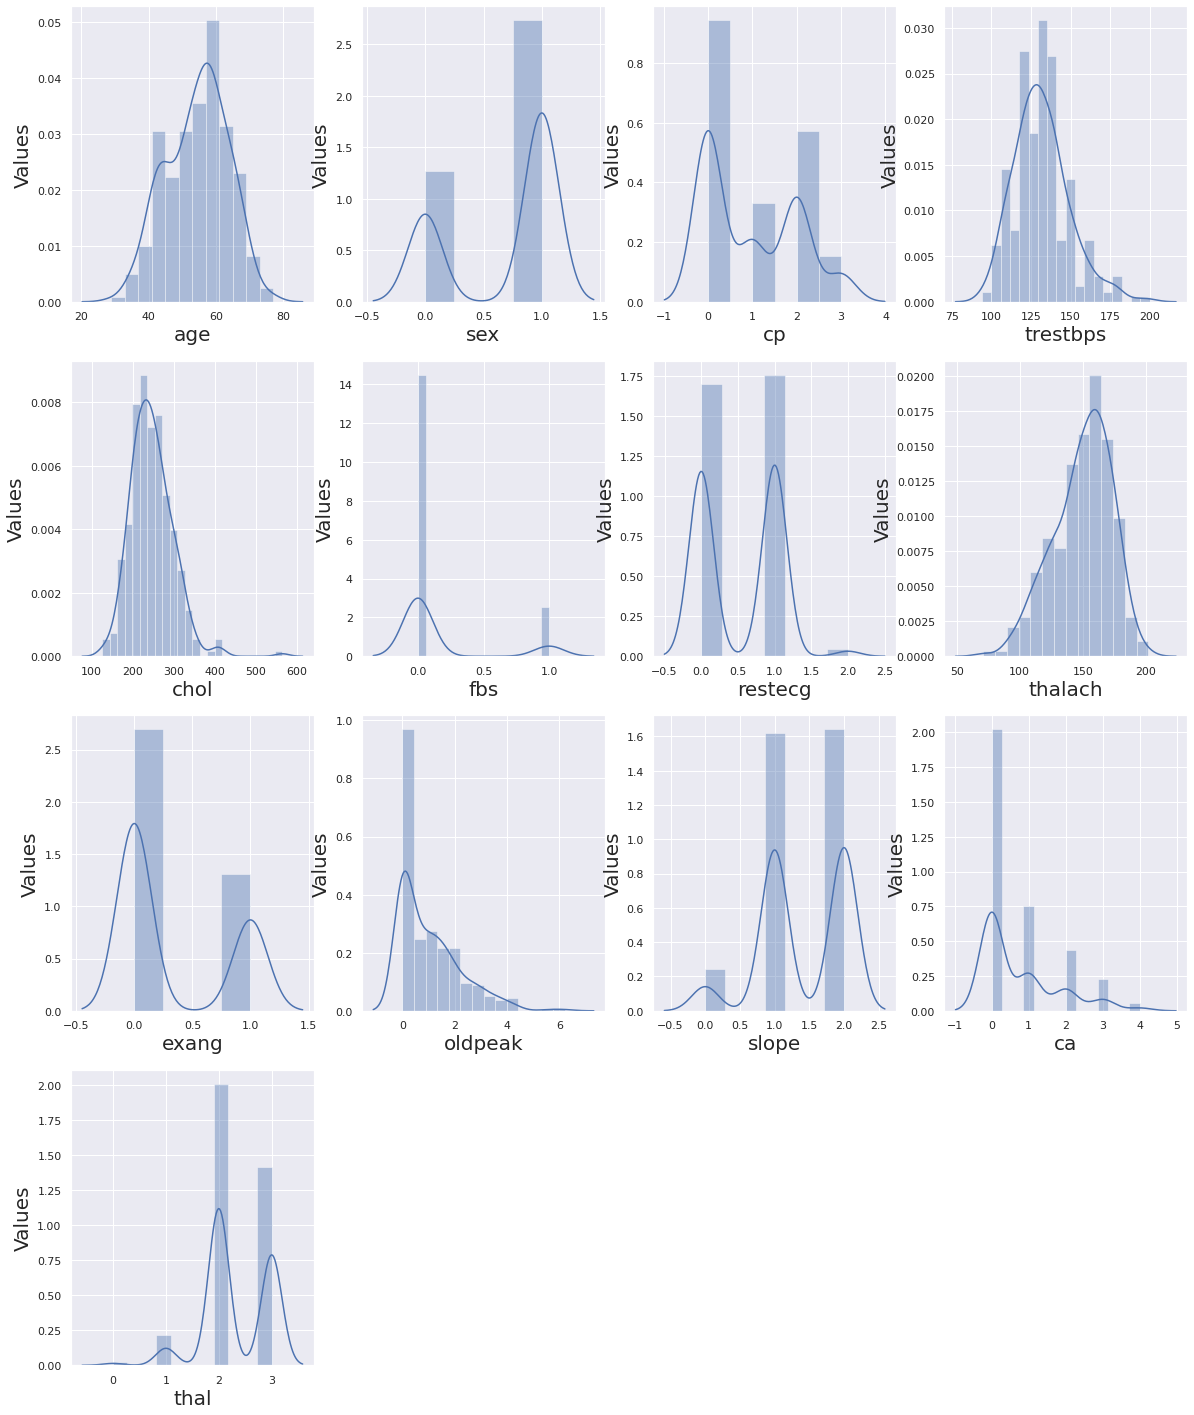

In [9]:
#Plotting the distribution plot.
plt.figure(figsize=(20,25))
plotnumber=1

for column in heart_df:
  if plotnumber<14:
    ax=plt.subplot(4,4,plotnumber)
    sns.distplot(heart_df[column])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Values',fontsize=20)
  plotnumber+=1
plt.show()

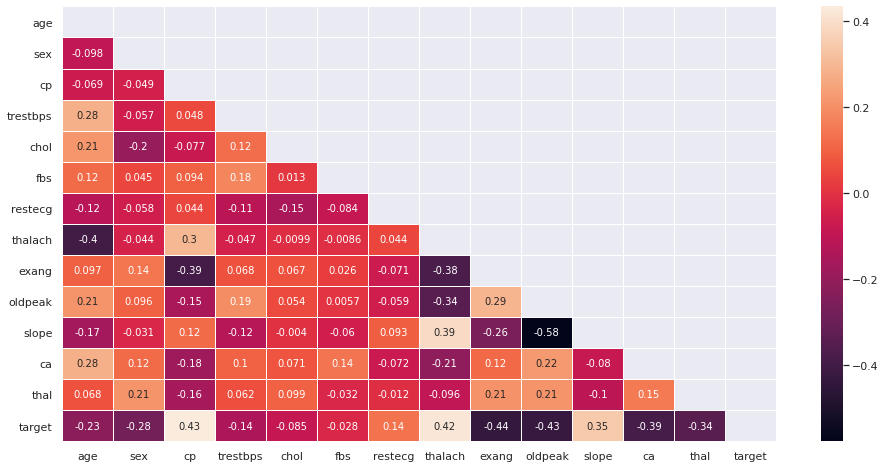

In [10]:
#Correlation matrix

plt.figure(figsize = (16, 8))

corr = heart_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

In [11]:
#checking the variance
heart_df.var()

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64

We can see ,there is a huge variance.So,we should normalise it.

 **Normalisation**

In [12]:
heart_df['trestbps']=np.log(heart_df['trestbps'])
heart_df['chol']=np.log(heart_df['chol'])
heart_df['thalach']=np.log(heart_df['thalach'])

np.var(heart_df[["trestbps",'chol','thalach']])

trestbps    0.016894
chol        0.041401
thalach     0.027054
dtype: float64

In [13]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
x=heart_df.drop('target',axis=1)    
y=heart_df['target']

In [15]:
#spliting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=123)


**1.Logistic Regression**

In [16]:
accuracies={}

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2')
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

acc=accuracy_score(y_test,y_pred)
accuracies['Logistic Regression']=acc*100
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred)*100,"%")



Accuracy score of the model is: 79.12087912087912 %


In [17]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred))

print("Classification Report",classification_report(y_test,y_pred))

Confusion matrix of the model [[33 12]
 [ 7 39]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.73      0.78        45
           1       0.76      0.85      0.80        46

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



**2.KNearestNeighbors**

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(x_train,y_train)

y_pred1 = knn.predict(x_test)

acc1=accuracy_score(y_test,y_pred)
accuracies['KNeighborsClassifier']=acc1*100

accuracy_score(y_train,knn.predict(x_train))
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred1)*100,"%")







Accuracy score of the model is: 73.62637362637363 %


In [19]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred1))

print("Classification Report",classification_report(y_test,y_pred1))


Confusion matrix of the model [[31 14]
 [10 36]]
Classification Report               precision    recall  f1-score   support

           0       0.76      0.69      0.72        45
           1       0.72      0.78      0.75        46

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91



**3.SVC**

In [20]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

y_pred2 = svc.predict(x_test)

acc2=accuracy_score(y_test,y_pred2)
accuracies['SVC']=acc2*100

accuracy_score(y_train,svc.predict(x_train))

print("Accuracy score of the model is:",accuracy_score(y_test,y_pred2)*100,"%")







Accuracy score of the model is: 60.43956043956044 %


In [21]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred2))

print("Classification Report",classification_report(y_test,y_pred2))

Confusion matrix of the model [[17 28]
 [ 8 38]]
Classification Report               precision    recall  f1-score   support

           0       0.68      0.38      0.49        45
           1       0.58      0.83      0.68        46

    accuracy                           0.60        91
   macro avg       0.63      0.60      0.58        91
weighted avg       0.63      0.60      0.58        91



**4.DecisionTreeClassifier**

In [22]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred3 = dtc.predict(x_test)
acc3=accuracy_score(y_test,y_pred)
accuracies['DecisionTreeClassifier']=acc3*100

accuracy_score(y_train,dtc.predict(x_train))
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred3)*100,"%")






Accuracy score of the model is: 75.82417582417582 %


In [23]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred3))

print("Classification Report",classification_report(y_test,y_pred3))


Confusion matrix of the model [[34 11]
 [11 35]]
Classification Report               precision    recall  f1-score   support

           0       0.76      0.76      0.76        45
           1       0.76      0.76      0.76        46

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



In [24]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [25]:
grid_search.best_score_

0.8351052048726467

In [26]:
y_pred4 = dtc.predict(x_test)
acc4=accuracy_score(y_test,y_pred4)
accuracies['DecisionTreeClassifier']=acc4*100
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred4)*100,"%")



Accuracy score of the model is: 75.82417582417582 %


In [27]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred4))

print("Classification Report",classification_report(y_test,y_pred4))

Confusion matrix of the model [[34 11]
 [11 35]]
Classification Report               precision    recall  f1-score   support

           0       0.76      0.76      0.76        45
           1       0.76      0.76      0.76        46

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



**5.RandomForestClassifier**

In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rfc.fit(x_train, y_train)

y_pred5 = rfc.predict(x_test)


acc5=accuracy_score(y_test,y_pred5)
accuracies['RandomForestClassifier']=acc5*100


accuracy_score(y_train,rfc.predict(x_train))
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred5)*100,"%")





Accuracy score of the model is: 80.21978021978022 %


In [29]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred5))

print("Classification Report",classification_report(y_test,y_pred5))


Confusion matrix of the model [[33 12]
 [ 6 40]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.73      0.79        45
           1       0.77      0.87      0.82        46

    accuracy                           0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



**Boosting**

In [30]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1)
gbc.fit(x_train, y_train)

y_pred6 = gbc.predict(x_test)

acc6=accuracy_score(y_test,y_pred6)
accuracies['GradientBoosting']=acc5*100
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred6)*100,"%")



Fitting 5 folds for each of 32 candidates, totalling 160 fits
Accuracy score of the model is: 78.02197802197803 %


In [32]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred6))

print("Classification Report",classification_report(y_test,y_pred6))

Confusion matrix of the model [[30 15]
 [ 5 41]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.67      0.75        45
           1       0.73      0.89      0.80        46

    accuracy                           0.78        91
   macro avg       0.79      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91



In [33]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gblinear', learning_rate = 1, max_depth = 6, n_estimators = 10)
xgb.fit(x_train, y_train)

y_pred7 = xgb.predict(x_test)

acc7=accuracy_score(y_test,y_pred7)
accuracies['XGBClassifier']=acc6*100
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred7)*100,"%")

print("Confusion matrix of the model",confusion_matrix(y_test,y_pred7))

print("Classification Report",classification_report(y_test,y_pred7))

[06:02:45] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:02:45] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score of the model is: 82.41758241758241 %
Confusion matrix of the model [[34 11]
 [ 5 41]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.76      0.81        45
           1       0.79      0.89      0.84        46

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.8

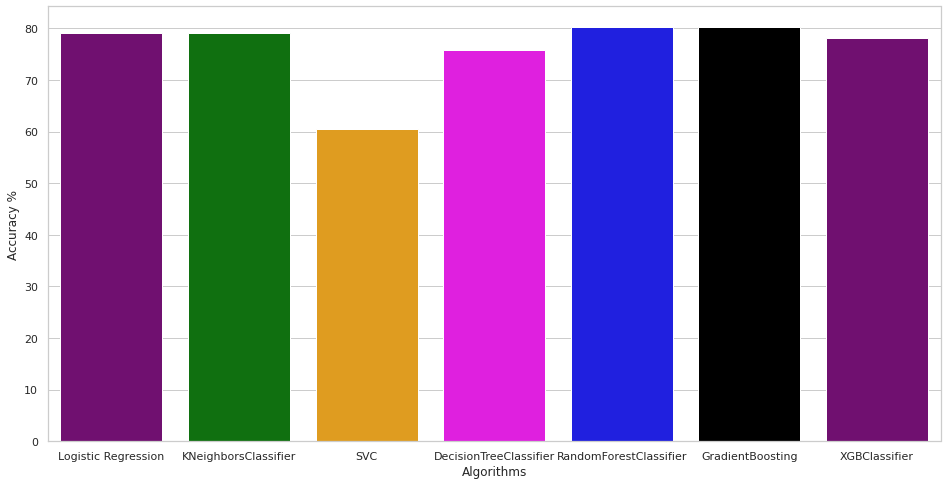

In [34]:
colors = ["purple", "green", "orange", "magenta","blue","black"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()